<a href="https://colab.research.google.com/github/vaibhavhirani/ML-Loan-Assignment/blob/main/feature_engineered.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import os
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot as plt
os.listdir('/content/drive/MyDrive/')

['Getting started.pdf',
 'Loan Dataset',
 'Colab Notebooks',
 'filtered_loan_2017Q1.csv',
 'filtered_LoanStats_securev1_2017Q1.csv',
 'filtered_LoanStats_securev1_2017Q2.csv',
 'filtered_LoanStats_securev1_2017Q3.csv',
 'filtered_LoanStats3c_securev1_2014.csv',
 'filtered_LoanStats3d_securev1_2015.csv',
 'Ficoed',
 'ML_Loan']

In [47]:
loan_data = pd.read_csv("./drive/MyDrive/Ficoed/filtered_LoanStats.csv", sep=",")

In [48]:
data = loan_data
loan_data.head()
loan_data.shape

(457395, 75)

In [49]:
loan_data.describe()

,loan_amnt,installment,grade,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,fico_average,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,debt_settlement_flag_N,debt_settlement_flag_Y
count,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.00000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000
mean,0.347708,0.250675,0.307491,0.008510,0.783487,0.018371,0.008647,0.116261,0.121392,0.002791,0.006364,0.059238,0.143815,0.000914,0.000949,0.000030,0.034832,0.003186,0.090792,0.026776,0.001049,0.000135,0.213912,0.033532,0.037730,0.013647,0.121124,0.100154,0.074852,0.119733,0.058437,0.100625,0.104760,0.125669,0.130561,0.002418,0.086035,0.933073,0.012388,0.000669,0.017193,0.018506,0.027305,0.019856,0.179795,0.000164,0.499113,0.000002,0.104573,0.396148,0.296962,0.410759,0.292279,0.008653,0.223710,0.604349,0.000002,0.060307,0.004012,0.018026,0.010437,0.00645,0.048238,0.000586,0.009191,0.006014,0.000024,0.745061,0.254939,0.433754,0.566246,0.996716,0.003284,0.982037,0.017963
std,0.218878,0.149479,0.221944,0.007405,0.411868,0.008895,0.023302,0.163147,0.061438,0.007377,0.008703,0.026794,0.072844,0.007626,0.013482,0.001497,0.038492,0.003573,0.059552,0.032057,0.011708,0.007474,0.110724,0.041946,0.044334,0.034105,0.073334,0.057127,0.046096,0.069744,0.049837,0.054395,0.065740,0.070821,0.060619,0.013218,0.069922,0.098133,0.033192,0.004949,0.017355,0.017571,0.027645,0.020288,0.164272,0.012804,0.500000,0.001479,0.306002,0.489096,0.456920,0.491972,0.454810,0.092620,0.416731,0.488991,0.001479,0.238055,0.063212,0.133045,0.101629,0.08005,0.214270,0.024199,0.095429,0.077320,0.004904,0.435828,0.435828,0.495593,0.495593,0.057210,0.057210,0.132816,0.132816
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [50]:
y = data["loan_status"]
X = data.drop(['loan_status'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Accuracy:  0.7108188764634507
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.34      0.36      0.35     19844
         1.0       0.82      0.81      0.81     71635

    accuracy                           0.71     91479
   macro avg       0.58      0.58      0.58     91479
weighted avg       0.72      0.71      0.71     91479

Confusion Matrix: 
 [[ 7189 12655]
 [13799 57836]]
ROC_AUC score:  0.5848232247687473
AUPRC score:  0.8893437986335464




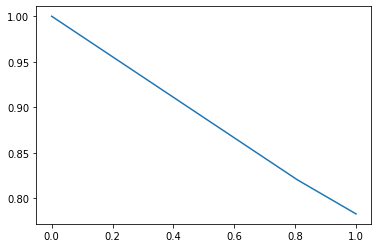

In [54]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_true=y_test, y_pred=y_pred))
print("ROC_AUC score: ", roc_auc_score(y_test, y_pred))

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

print("AUPRC score: ", auc(recall, precision))
print("\n")
plt.plot(recall, precision)
plt.show()

Accuracy:  0.8054198231288056
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.71      0.18      0.28     19844
         1.0       0.81      0.98      0.89     71635

    accuracy                           0.81     91479
   macro avg       0.76      0.58      0.59     91479
weighted avg       0.79      0.81      0.76     91479

Confusion Matrix: 
 [[ 3509 16335]
 [ 1465 70170]]
ROC_AUC score:  0.5781891856923734
AUPRC score:  0.903365346052083




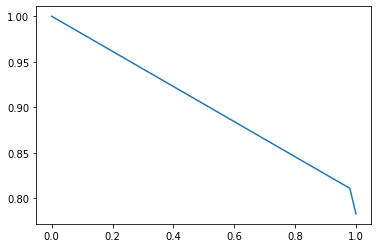

In [55]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear', random_state=0)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_true=y_test, y_pred=y_pred))
print("ROC_AUC score: ", roc_auc_score(y_test, y_pred))

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

print("AUPRC score: ", auc(recall, precision))
print("\n")
plt.plot(recall, precision)
plt.show()

debt_settlement_flag_N
grade
dti
mo_sin_old_rev_tl_op
avg_cur_bal


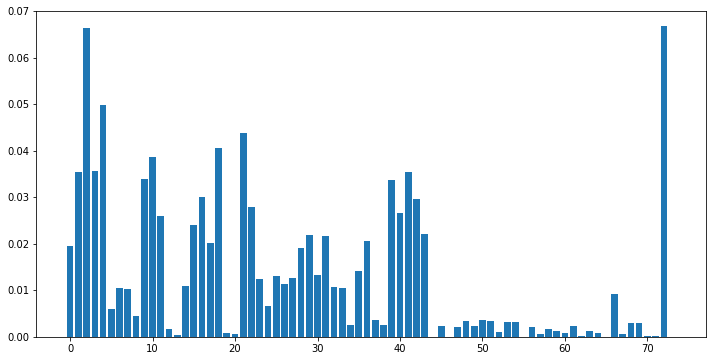

In [86]:
importance = clf.feature_importances_

l = list(enumerate(importance))
l = sorted(l, key=lambda x: x[1], reverse=True)[:5]

for i, v in l:
  print(X.columns[i])

# plot feature importance
plt.figure(figsize=(12, 6))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

annual_inc
total_bc_limit
debt_settlement_flag_N
total_il_high_credit_limit
num_rev_accts


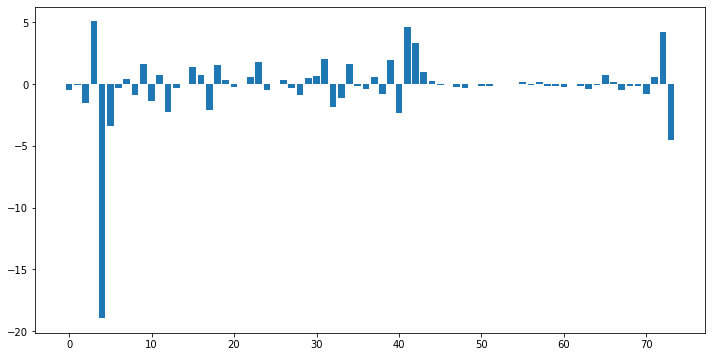

In [87]:
importance = log_reg.coef_[0]

l = list(enumerate(importance))
l = sorted(l, key=lambda x: x[1], reverse=True)[:5]

for i, v in l:
  print(X.columns[i])

# plot feature importance
plt.figure(figsize=(12, 6))
plt.bar([x for x in range(len(importance))], importance)
plt.show()